# Worksheet 19

Name:  Sai Tejaswini Junnuri
UID: U92492167

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9958942797916506
0.9959243030032803
0.9959357036827332
0.9959441946271187
0.9959709713101331
0.9959720501888553
0.9960279900001346
0.9960470828506215
0.9960629140193376
0.9960760921601075
0.996085012827965
0.9961249776687284
0.9961446527042004
0.996142262260299


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[1, 1, 1, 0, 0]
0.31249999999999983


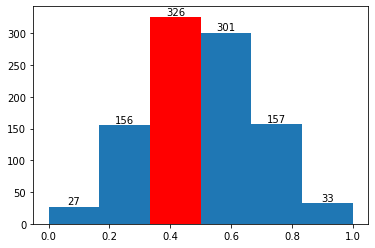

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

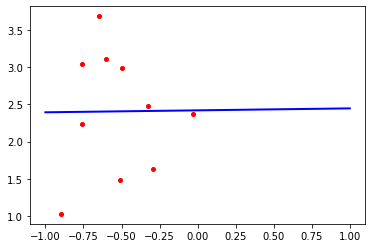

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = 2 + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = inv(X.T @ X) @ X.T @ y

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

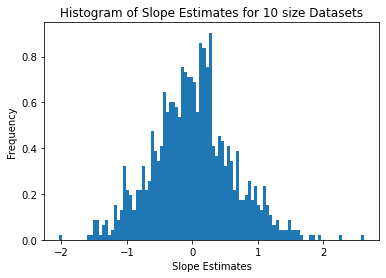

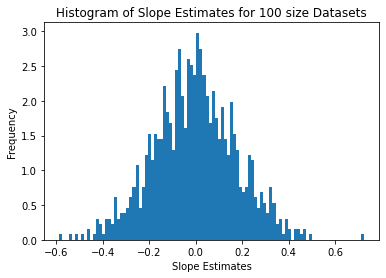

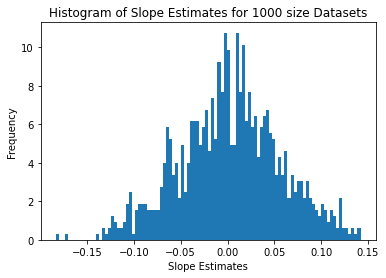

In [5]:
SAMPLE_SIZE = 10

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 2.0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta[1]) 

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimates')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates for 10 size Datasets')
plt.show()

SAMPLE_SIZE = 100

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 2.0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta[1]) 

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimates')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates for 100 size Datasets')
plt.show()

SAMPLE_SIZE = 1000

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 2.0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta[1]) 

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimates')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates for 1000 size Datasets')
plt.show()

Th slope when there is no relation between X, y looks like a normal distribution cenetered around 0. 0 slope means no change in y with respect to any change in X which is the case. As the sample size increases the slopes distributions becomes narrow and colser to 0

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

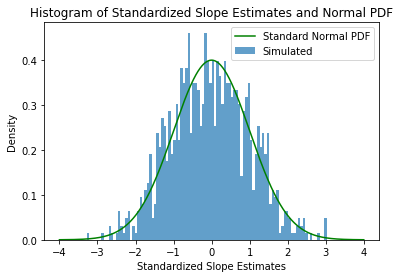

In [6]:

from scipy.stats import norm

SAMPLE_SIZE = 10
true_beta = 0  # Assuming the true slope is 0 (no relationship)
sigma = 2.0    # Standard deviation of the noise in y

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = true_beta * xlin + sigma * np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta_hat = inv(X.T @ X) @ X.T @ y
    S_kk = inv(X.T @ X)[1, 1] 
    z_k = (beta_hat[1] - true_beta) / np.sqrt(sigma**2 * S_kk)
    beta_hist.append(z_k)

# Histogram of standardized estimates
xs = np.linspace(-4, 4, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True, alpha=0.7, label='Simulated')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal PDF')
ax.set_xlabel('Standardized Slope Estimates')
ax.set_ylabel('Density')
ax.set_title('Histogram of Standardized Slope Estimates and Normal PDF')
ax.legend()
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

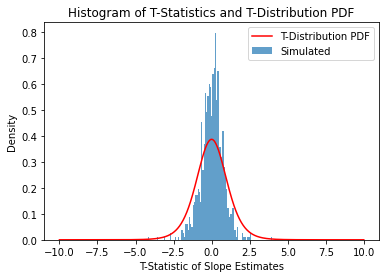

In [7]:
from scipy.stats import t

SAMPLE_SIZE = 10
true_beta = 0  

def standard_error(ytrue, ypred, p):
    n = len(ytrue)
    rss = np.sum((ytrue - ypred) ** 2)
    return np.sqrt(rss / (n - p))

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = true_beta * xlin + np.random.randn(SAMPLE_SIZE) * 2
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta_hat = inv(X.T @ X) @ X.T @ y
    ypred = X @ beta_hat
    se = standard_error(y, ypred, 2)
    t_stat = beta_hat[1] / se
    beta_hist.append(t_stat)

# Histogram of t-statistics
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True, alpha=0.7, label='Simulated')
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red', label='T-Distribution PDF')
ax.set_xlabel('T-Statistic of Slope Estimates')
ax.set_ylabel('Density')
ax.set_title('Histogram of T-Statistics and T-Distribution PDF')
ax.legend()
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


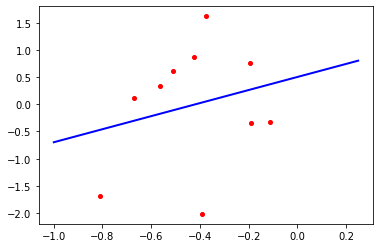

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [9]:
# Calculate residuals and RSS
residuals = y - X @ beta_hat
rss = np.sum(residuals ** 2)

# Degrees of freedom and sample size
n = len(x)
p = 2  # Number of parameters (intercept and slope)

# Standard error of the slope estimate
x_mean = np.mean(x)
se_beta1 = np.sqrt(rss / (n - p) / np.sum((x - x_mean) ** 2))

# t-statistic
t_stat = beta_hat[1] / se_beta1

# p-value (two-tailed test)
p_value = 2 * t.sf(np.abs(t_stat), n - p)

# Printing results
print(f"Slope Estimate: {beta_hat[1]}")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


Slope Estimate: 1.19902827199062
t-statistic: 0.6842586696389726
p-value: 0.5131420720905752
